In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scripts.functions_libs import process_data

%matplotlib inline

In [86]:
# Initial dataframe import

df = process_data('../../data/raw/adult.data')
df.head()

,Age,Workclass,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
# Initial dataframe visualization

print("Number of rows, columns: {}".format(df.shape))

Number of rows, columns: (32561, 15)


In [88]:
# Viewing numerical column data basic statistics

pd.options.display.float_format = "{:.1f}".format
df.describe()

,Age,Final Weight,Education Num,Capital Gain,Capital Loss,Hours per Week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.6,189778.4,10.1,1077.6,87.3,40.4
std,13.6,105550.0,2.6,7385.3,403.0,12.3
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [89]:
# Number of unique values for each column

df.nunique(axis=0)

Age                  73
Workclass             9
Final Weight      21648
Education            16
Education Num        16
Marital Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital Gain        119
Capital Loss         92
Hours per Week       94
Native Country       42
Salary                2
dtype: int64

In [90]:
# Looking at some of the columns unique variables

print("Education uniques: \n{}\n".format(df.Education.unique()))
print("Relationship uniques: \n{}\n".format(df.Relationship.unique()))
print("Occupation uniques: \n{}".format(df.Occupation.unique()))

Education uniques: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Relationship uniques: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Occupation uniques: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [112]:
# Setting theme

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_theme(font_scale=1.3)

plt.rc("axes.spines", top=False, right=False)

In [113]:
df.dtypes

Age                int64
Workclass         object
Final Weight       int64
Education         object
Education Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per Week     int64
Native Country    object
Salary            object
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Count'>

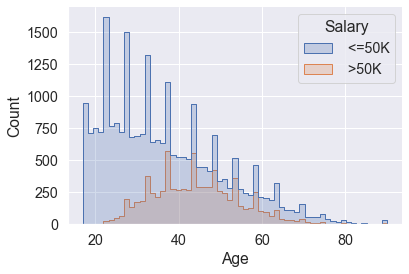

In [142]:
# Histogram of age and salary distribution. This shows that the majority of people have <=50K salaries,
# and those that do make >50K are generally older population. Data has outliers and needs more cleaning.

sns.histplot(
    df,
    x="Age",
    hue="Salary",
    element="step",
    common_norm=False,
)

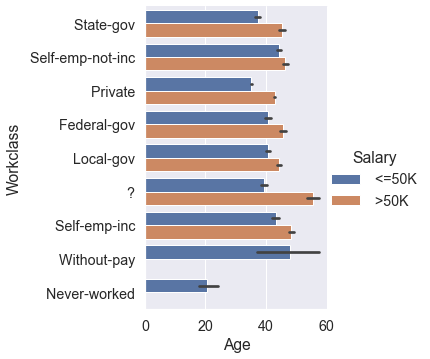

In [158]:
# Grouped bar chart of salaries counts grouped by workclass. 

sns.catplot(
    x="Age",
    y="Workclass",
    hue="Salary",
    kind="bar",
    data=df
    )

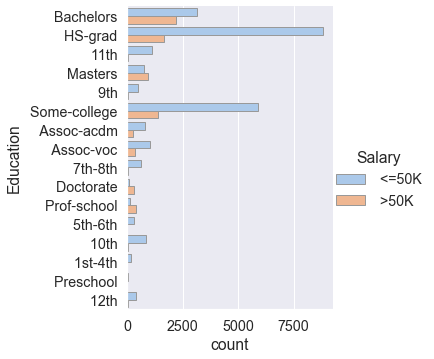

In [152]:
# Grouped bar chart of the salaries of people in each level of education. Some grouping of variables
# would be useful for 'Education Level', such as a group of all highschool grades.

sns.catplot(
    y="Education",
    hue="Salary",
    kind="count",
    palette="pastel",
    edgecolor=".6",
    data=df
)